# Домашнее задание "Модели ARMA"

## Задание

1. Выберите ряд из первого задания.
2. Постройте его модель ARIMA.
3. Оформите отчёт в Jupyter-ноутбук.

## Решение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import boxcox

from statsmodels.tsa.stattools import adfuller
# import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

### 1. Time Series_05 "Monthly Sales of Company X Jan-6"

#### 1.1 Загрузка данных

In [69]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
series.set_index("Month", inplace=True)
series.index = pd.to_datetime(series.index)
series

,Count
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36
...,...
1971-01-01,628
1971-02-01,308
1971-03-01,324


#### 1.2 Анализ временного ряда

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


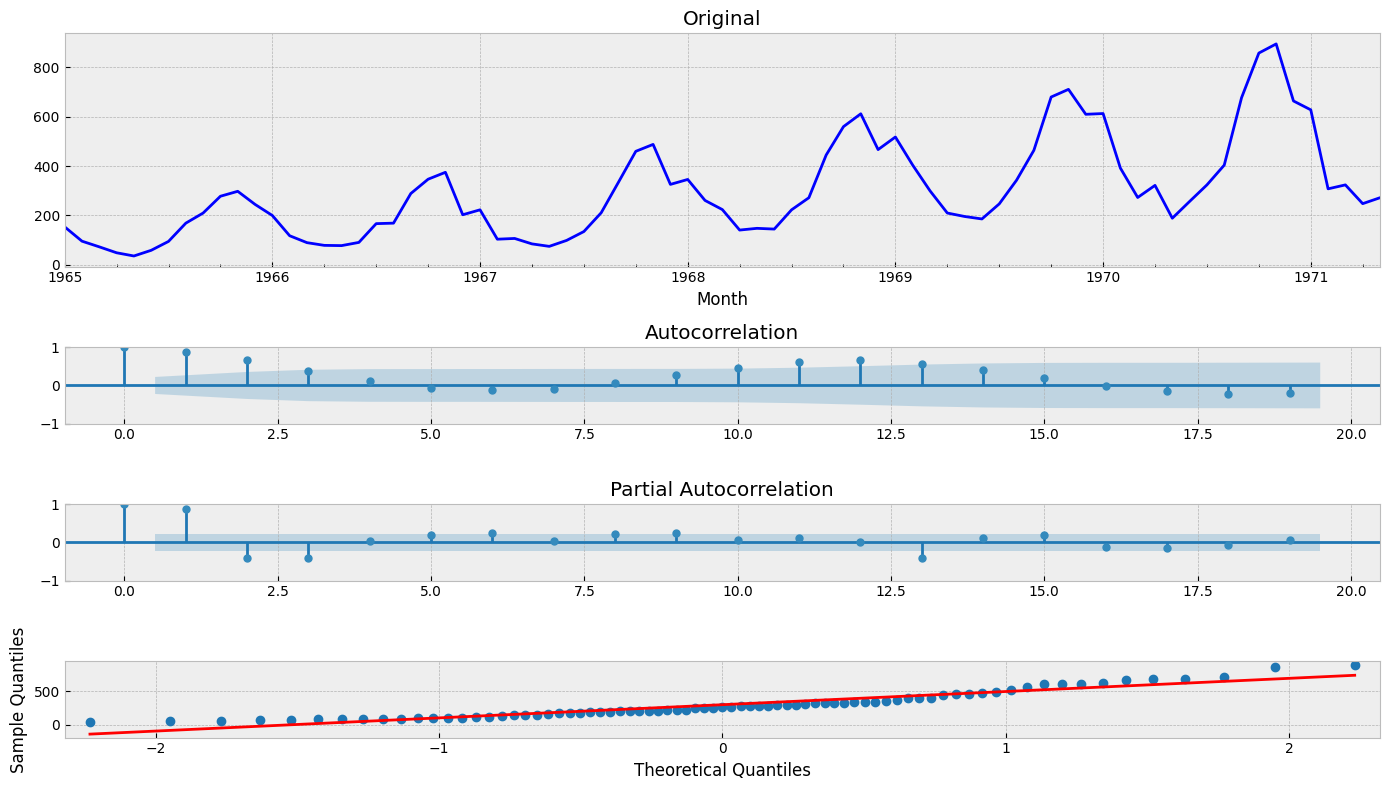

In [71]:
tsplot(series['Count'])

Временной ряд не является стационарным

#### 1.3 Выравнивание дисперсии

In [72]:
series = boxcox(series['Count'], 0)

### 2. Построение модели ARIMA

#### 2.1 Подбор гиперпараметров

In [73]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for j in range(5):
        try:
            tmp_mdl = ARIMA(series, order=(i, 0, j)).fit()
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: Us

aic: -27.40634 | order: (4, 2)


/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
arma_model = ARIMA(series, order=(4, 0, 2), trend='n').fit()

/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   77
Model:                 ARIMA(4, 0, 2)   Log Likelihood                 -15.858
Date:                Sun, 26 May 2024   AIC                             45.716
Time:                        21:52:45   BIC                             62.123
Sample:                             0   HQIC                            52.279
                                 - 77                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1809      0.127     -1.422      0.155      -0.430       0.068
ar.L2          1.0416      0.147      7.102      0.000       0.754       1.329
ar.L3          0.5356      0.114      4.718      0.0

Results of Dickey-Fuller Test:
Test Statistic                -6.888612e+00
p-value                        1.373954e-09
#Lags Used                     1.000000e+01
Number of Observations Used    6.600000e+01
Critical Value (1%)           -3.533560e+00
Critical Value (5%)           -2.906444e+00
Critical Value (10%)          -2.590724e+00
dtype: float64


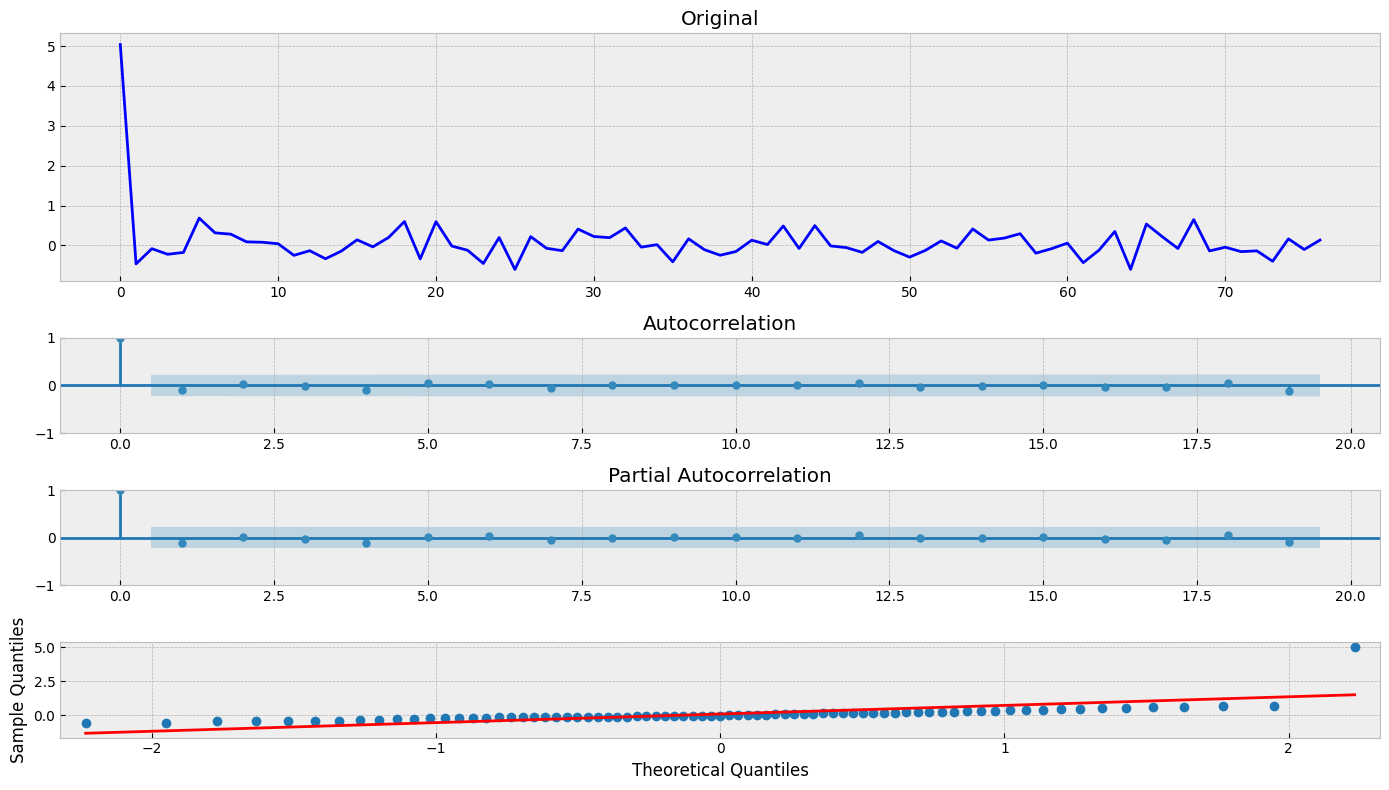

In [77]:
tsplot(arma_model.resid)

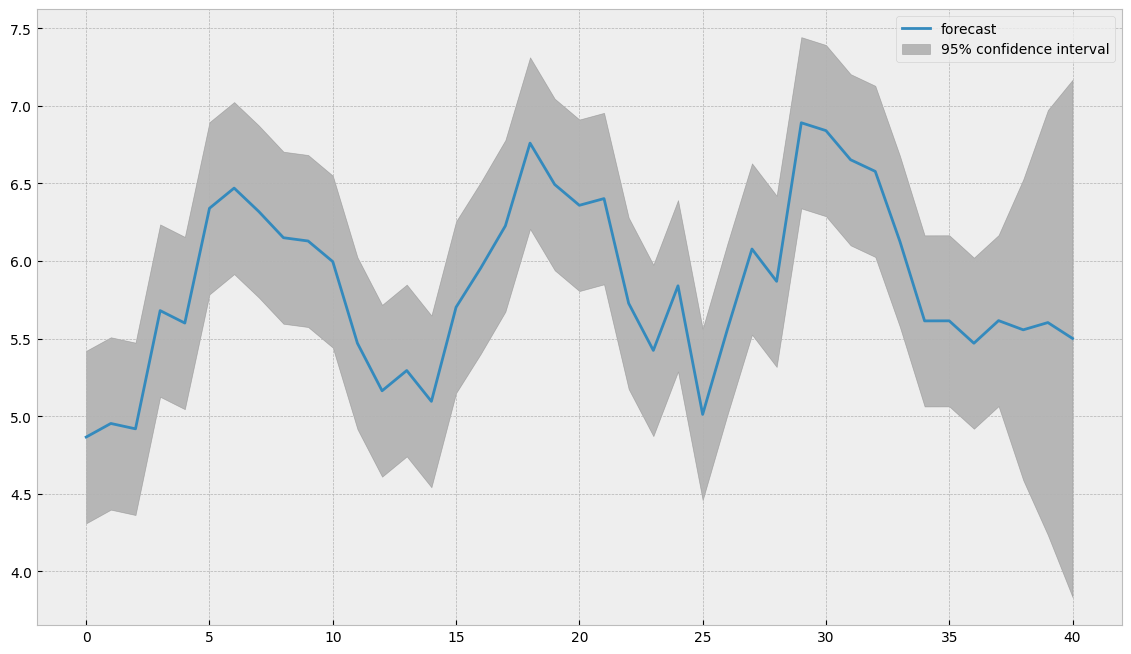

In [78]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plot_predict(arma_model, start=40, end=80, ax=ax)

In [79]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = ARIMA(series, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWar

aic: -33.21456 | order: (3, 1, 2)


/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
arima_model = ARIMA(series, order=(3, 1, 2), trend='n').fit()

In [81]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   77
Model:                 ARIMA(3, 1, 2)   Log Likelihood                  22.607
Date:                Sun, 26 May 2024   AIC                            -33.215
Time:                        21:53:59   BIC                            -19.230
Sample:                             0   HQIC                           -27.626
                                 - 77                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1824      0.100     11.851      0.000       0.987       1.378
ar.L2         -0.0464      0.173     -0.267      0.789      -0.386       0.294
ar.L3         -0.5480      0.100     -5.482      0.0

Results of Dickey-Fuller Test:
Test Statistic                -32.154608
p-value                         0.000000
#Lags Used                      0.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


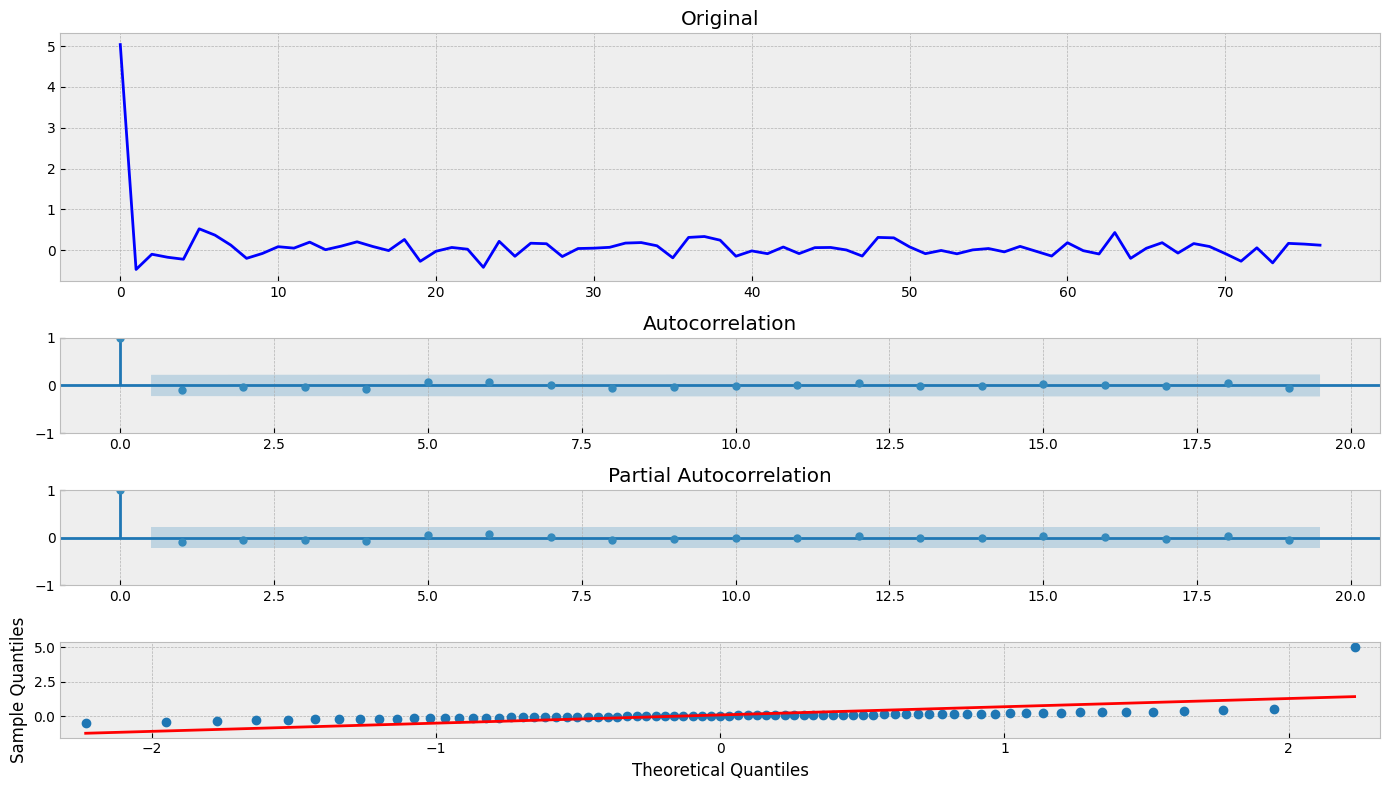

In [82]:
tsplot(arima_model.resid)

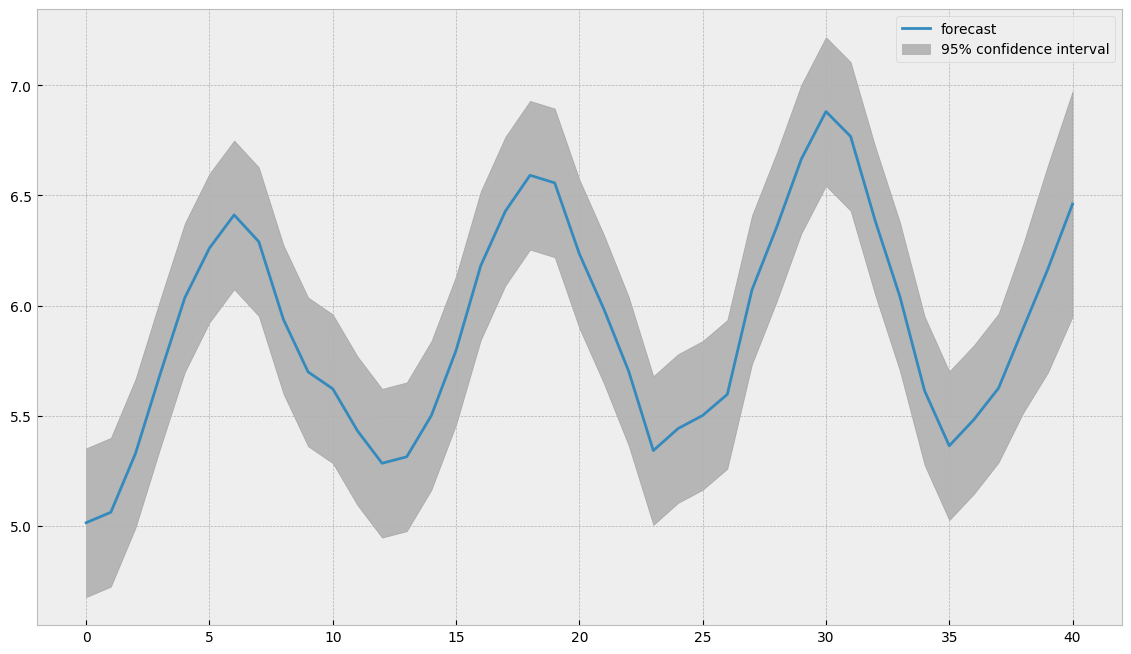

In [83]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plot_predict(arima_model, start=40, end=80, ax=ax)

## Дополнительное задание

Попробуйте спрогнозировать график классическим ML